# Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `“total”` = total number of cyclists in a time interval

In [9]:
import pandas as pd

df = pd.read_csv('rad_15min_condensed.csv')
df.head(10)

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt
0,2022.11.01,06:15,06:30,Kreuther,0.0,0.0,0.0
1,2022.11.01,06:15,06:30,Margareten,3.0,1.0,4.0
2,2022.11.01,06:15,06:30,Olympia,0.0,0.0,0.0
3,2022.11.01,06:30,06:45,Arnulf,6.0,0.0,6.0
4,2022.11.01,06:30,06:45,Erhardt,1.0,1.0,2.0
5,2022.11.01,06:30,06:45,Hirsch,1.0,3.0,4.0
6,2022.11.01,06:30,06:45,Kreuther,0.0,1.0,1.0
7,2022.11.01,06:30,06:45,Margareten,3.0,3.0,6.0
8,2022.11.01,06:30,06:45,Olympia,2.0,2.0,4.0
9,2022.11.01,06:45,07:00,Arnulf,3.0,0.0,3.0


## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [10]:
df['datetime_start'] = pd.to_datetime(df['datum'] + ' ' + df['uhrzeit_start'], format='%Y.%m.%d %H:%M')
df['datetime_end'] = pd.to_datetime(df['datum'] + ' ' + df['uhrzeit_ende'], format='%Y.%m.%d %H:%M')

df.drop(columns=['datum', 'uhrzeit_start', 'uhrzeit_ende'], inplace=True)

df.head()
# looks good

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00


## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**  
  - The **peak hour (`peakhour`)**  
  - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**  



In [11]:
df['hour'] = df['datetime_start'].dt.hour
hourly_counts = df.groupby(['zaehlstelle', 'hour'])['gesamt'].sum().reset_index()
peak_hours = hourly_counts.loc[hourly_counts.groupby('zaehlstelle')['gesamt'].idxmax()]
peak_hours.rename(columns={'hour': 'peakhour', 'gesamt': 'total_cyclists_peakhour'}, inplace=True)
peak_hours

,zaehlstelle,peakhour,total_cyclists_peakhour
8,Arnulf,8,97928.0
42,Erhardt,18,314197.0
56,Hirsch,8,148568.0
79,Kreuther,7,15395.0
113,Margareten,17,160978.0
138,Olympia,18,166817.0


In [12]:
df.head(10)

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end,hour
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
5,Hirsch,1.0,3.0,4.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
6,Kreuther,0.0,1.0,1.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
7,Margareten,3.0,3.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
8,Olympia,2.0,2.0,4.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
9,Arnulf,3.0,0.0,3.0,2022-11-01 06:45:00,2022-11-01 07:00:00,6


## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**  
- **Is there a repeating pattern in the data?**  
- **What do the ACF/PACF plots suggest about seasonal effects?**  


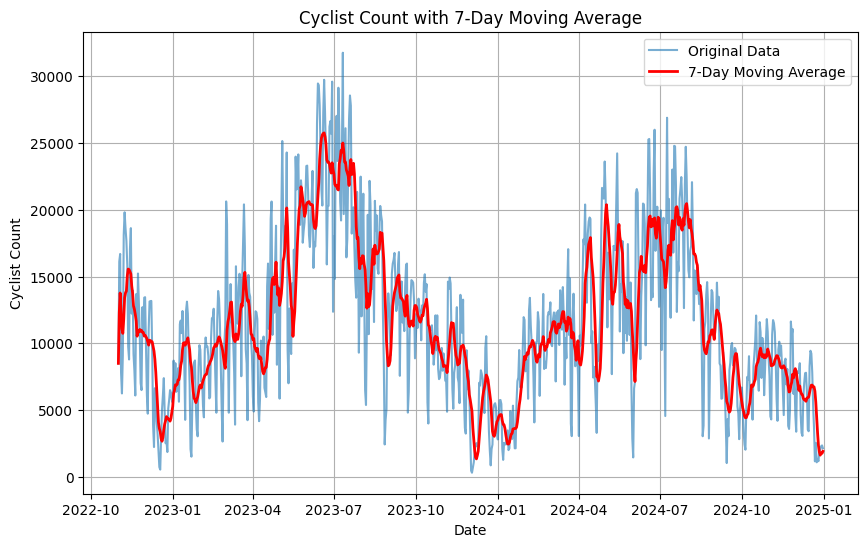

In [13]:
# 1.)
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset again, as we need the date
df = pd.read_csv('rad_15min_condensed.csv')
df['datum'] = pd.to_datetime(df['datum'])
# group by date, to get a total amount for each day
day_counts = df.groupby(['datum'])['gesamt'].sum().reset_index()
# print(day_counts.head(10))
# calculate 7-day moving average
day_counts['moving_average'] = day_counts['gesamt'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(day_counts['datum'], day_counts['gesamt'], label='Original Data', alpha=0.6)
plt.plot(day_counts['datum'], day_counts['moving_average'], label='7-Day Moving Average', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cyclist Count')
plt.title('Cyclist Count with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# You can see that there are way more cyclists active in the summer, compared to winter

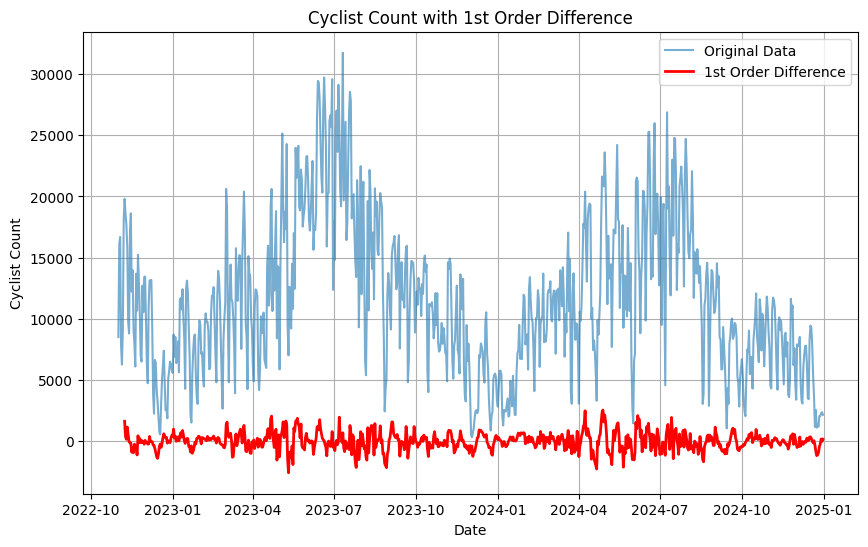

In [14]:
day_counts["1stOrder"] = day_counts["gesamt"].diff().rolling(window=7, min_periods=7).mean() # increased min_periods to remove the peak around the first day

plt.figure(figsize=(10, 6))
plt.plot(day_counts['datum'], day_counts['gesamt'], label='Original Data', alpha=0.6)
plt.plot(day_counts['datum'], day_counts['1stOrder'], label='1st Order Difference', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cyclist Count')
plt.title('Cyclist Count with 1st Order Difference')
plt.legend()
plt.grid(True)
plt.show()
# removes the trends, as suggested

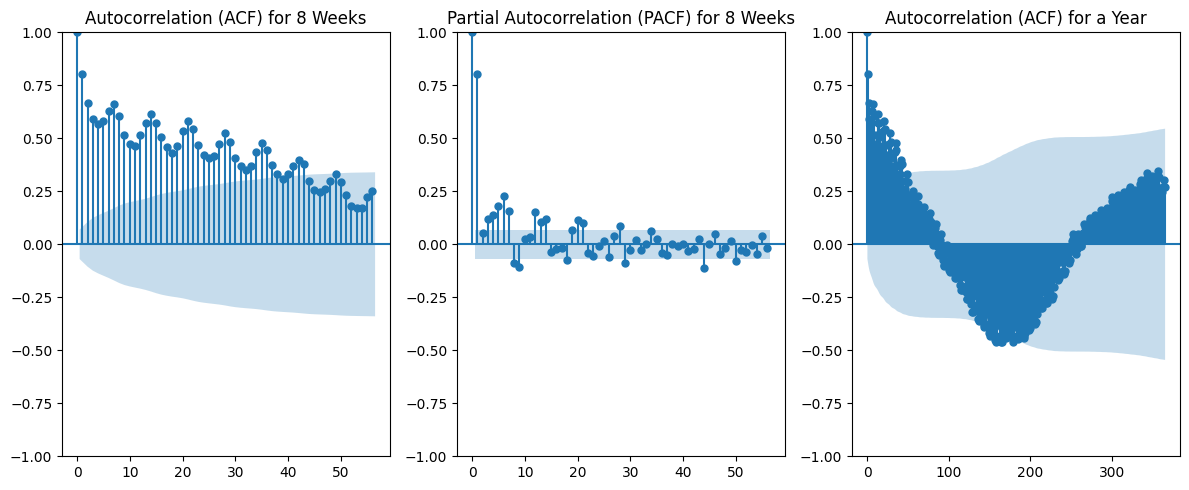

In [15]:
# 3.)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plot_acf(day_counts['gesamt'], lags=56, ax=plt.gca())
plt.title('Autocorrelation (ACF) for 8 Weeks')

plt.subplot(1, 3, 2)
plot_pacf(day_counts['gesamt'], lags=56, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF) for 8 Weeks')

plt.subplot(1, 3, 3)
plot_acf(day_counts['gesamt'], lags=365, ax=plt.gca())
plt.title('Autocorrelation (ACF) for a Year')
plt.tight_layout()
plt.show()


# Answers
**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**
No clear trend if that means that the overall amount changes, we can see different patterns, discussed in the next sections.
- **Is there a repeating pattern in the data?**
Yes, there are more cyclists in the summer, less in the winter. We can also see a (weak) weekly pattern in the ACF/PACF data of the first two AFC/PACF plots (more on that in the next answer).

- **What do the ACF/PACF plots suggest about seasonal effects?**

For the first two I chose lag=56, 8 weeks. You can see that the value strongly depends on the day before and also the day before that. Additionally, we can see a (weak) weekly pattern. As the lag gets bigger, we can still see a weekly pattern, but the overall ACF declines, so we can conclude that weeks that are closer correlate more strongly, suggesting a seasonal effect, which was already assumed by the plots above.

For the third one I chose lag=365, a year. We can see a positive ACF for roughly three months (length of a season), then a negative one for the opposing season and then it is positive again. That means that days from the summer correlate with days that are close by (summer, late spring, early fall) and an opposing effect can be seen compared to winter days.

